In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import seaborn as sns

In [3]:
data = pd.read_csv('/content/Restaurant_reviews_with_sentiment (1).csv')
data

,Restaurant,Reviewer,Review,Rating,Unnamed: 4,Unnamed: 5,Sentiment
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,NaN,NaN,Good
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,NaN,NaN,Good
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,NaN,NaN,Good
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,NaN,NaN,Good
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,NaN,NaN,Good
...,...,...,...,...,...,...,...
3253,Marsala Food Company,Snehal Kondaveeti,Marsala Food company is an alright place to ha...,3.0,NaN,NaN,Bad
3254,Marsala Food Company,Tummyful_hyd,Recently we were invited for a food tasting se...,5.0,NaN,NaN,Good
3255,Marsala Food Company,Love4cibo,I was so keen to try this place after the pict...,5.0,NaN,NaN,Good
3256,Marsala Food Company,Mohammed Masih Uddin (Hyderabadi Food Therapy),"Heard alot about their Buffets, So headed here...",5.0,NaN,NaN,Good


In [4]:
data.drop('Unnamed: 4', axis=1, inplace=True)
print("Columns after dropping Unnamed: 4:", data.columns)
data.drop('Restaurant',axis=1,inplace = True)
print("Columns after dropping Restaurant:", data.columns)
data.drop('Reviewer',axis=1,inplace = True)
print("Columns after dropping Reviewer:", data.columns)
data.drop('Rating',axis=1,inplace = True)
print("Columns after dropping Rating:", data.columns)
data.drop('Unnamed: 5',axis=1,inplace = True)
print("Columns after dropping Unnamed: 5:", data.columns)

Columns after dropping Unnamed: 4: Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Unnamed: 5',
       'Sentiment'],
      dtype='object')
Columns after dropping Restaurant: Index(['Reviewer', 'Review', 'Rating', 'Unnamed: 5', 'Sentiment'], dtype='object')
Columns after dropping Reviewer: Index(['Review', 'Rating', 'Unnamed: 5', 'Sentiment'], dtype='object')
Columns after dropping Rating: Index(['Review', 'Unnamed: 5', 'Sentiment'], dtype='object')
Columns after dropping Unnamed: 5: Index(['Review', 'Sentiment'], dtype='object')


In [5]:
data

,Review,Sentiment
0,"The ambience was good, food was quite good . h...",Good
1,Ambience is too good for a pleasant evening. S...,Good
2,A must try.. great food great ambience. Thnx f...,Good
3,Soumen das and Arun was a great guy. Only beca...,Good
4,Food is good.we ordered Kodi drumsticks and ba...,Good
...,...,...
3253,Marsala Food company is an alright place to ha...,Bad
3254,Recently we were invited for a food tasting se...,Good
3255,I was so keen to try this place after the pict...,Good
3256,"Heard alot about their Buffets, So headed here...",Good


In [6]:
data.dropna(inplace=True)

In [7]:
# 2. Preprocessin
data['Review'] = data['Review'].str.lower().str.replace('[^\w\s]', '', regex=True)

In [8]:
# 3. Split Data
X_train, X_test, y_train, y_test = train_test_split(data['Review'], data['Sentiment'], test_size=0.2)

In [9]:
# 4. Vectorize Text
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
words_to_remove = {'not', 'no'}
# Get the stop words from the vectorizer and update the set
# Make sure to do this BEFORE calling fit_transform
new_stop_words = set(vectorizer.get_stop_words())
new_stop_words.difference_update(words_to_remove)

# Reinitialize the vectorizer with the modified stop words
vectorizer = TfidfVectorizer(stop_words=list(new_stop_words), max_features=5000)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [10]:
# 5. Train Model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

LogisticRegression()

In [11]:
# 6. Evaluate
predictions = model.predict(X_test_vec)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         Bad       0.91      0.75      0.82       227
        Good       0.88      0.96      0.92       425

    accuracy                           0.89       652
   macro avg       0.89      0.85      0.87       652
weighted avg       0.89      0.89      0.88       652



In [12]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=10)
dt.fit(X_train_vec, y_train)

DecisionTreeClassifier(max_depth=10)

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         Bad       0.91      0.75      0.82       227
        Good       0.88      0.96      0.92       425

    accuracy                           0.89       652
   macro avg       0.89      0.85      0.87       652
weighted avg       0.89      0.89      0.88       652



In [14]:
from sklearn.svm import SVC
svc=SVC() # default is rbf..
svc.fit(X_train_vec, y_train)

SVC()

In [15]:
y_pred=svc.predict(X_test_vec)
y_pred

array(['Bad', 'Bad', 'Good', 'Good', 'Good', 'Bad', 'Good', 'Bad', 'Good',
       'Good', 'Good', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Good',
       'Good', 'Good', 'Good', 'Bad', 'Good', 'Good', 'Bad', 'Good',
       'Bad', 'Good', 'Good', 'Good', 'Good', 'Good', 'Bad', 'Bad',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Bad', 'Good',
       'Good', 'Good', 'Good', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Good',
       'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Good', 'Good', 'Good',
       'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Bad', 'Bad',
       'Good', 'Good', 'Good', 'Bad', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Bad', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Bad', 'Good',
       'Good', 'Good', 'Bad', 'Good', 'Good', 'Good', 'Bad', 'Bad', 'Bad',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Bad', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Bad', 'Bad',
   

In [16]:
svc.score(X_test_vec,y_test)

0.8773006134969326

In [17]:
from sklearn import metrics
svcl=SVC(kernel='linear')
svcl.fit(X_train_vec, y_train)
y_pred=svcl.predict(X_test_vec)
print('Accuracy Score: with linear kernel')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score: with linear kernel
0.8834355828220859


In [18]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         Bad       0.91      0.75      0.82       227
        Good       0.88      0.96      0.92       425

    accuracy                           0.89       652
   macro avg       0.89      0.85      0.87       652
weighted avg       0.89      0.89      0.88       652



In [19]:
models = {
  "Logistic Regression": LogisticRegression(),
  "Decision Tree": DecisionTreeClassifier(max_depth=10),
  "SVC (RBF)": SVC(),
  "SVC (Linear)": SVC(kernel='linear')
}
results = {}
for model_name, model in models.items():
  print(f"Training and evaluating {model_name}...")
  model.fit(X_train_vec, y_train)
  predictions = model.predict(X_test_vec)
  report = classification_report(y_test, predictions, output_dict=True)
  results[model_name] = report['accuracy']
  print(f"Evaluation for {model_name}:\n")
  print(classification_report(y_test, predictions))
  print("-" * 50)
print("\nModel Comparison (Accuracy):")
for model_name, accuracy in results.items():
  print(f"{model_name}: {accuracy:.4f}")

Training and evaluating Logistic Regression...
Evaluation for Logistic Regression:

              precision    recall  f1-score   support

         Bad       0.91      0.75      0.82       227
        Good       0.88      0.96      0.92       425

    accuracy                           0.89       652
   macro avg       0.89      0.85      0.87       652
weighted avg       0.89      0.89      0.88       652

--------------------------------------------------
Training and evaluating Decision Tree...
Evaluation for Decision Tree:

              precision    recall  f1-score   support

         Bad       0.79      0.61      0.69       227
        Good       0.81      0.91      0.86       425

    accuracy                           0.81       652
   macro avg       0.80      0.76      0.77       652
weighted avg       0.80      0.81      0.80       652

--------------------------------------------------
Training and evaluating SVC (RBF)...
Evaluation for SVC (RBF):

              precision 

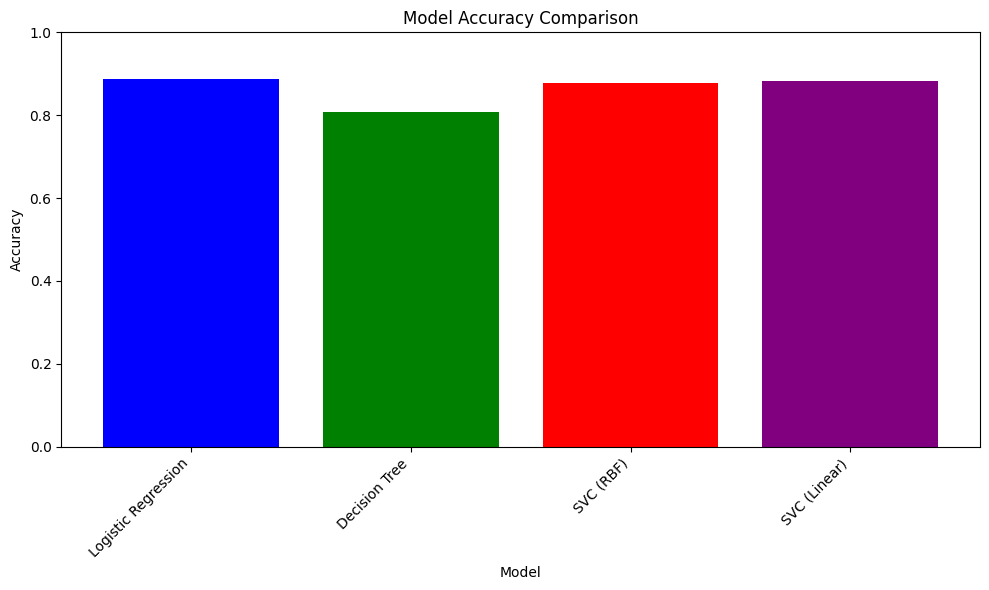

In [20]:

import matplotlib.pyplot as plt
model_names = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [21]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[177,  50],
       [ 26, 399]])

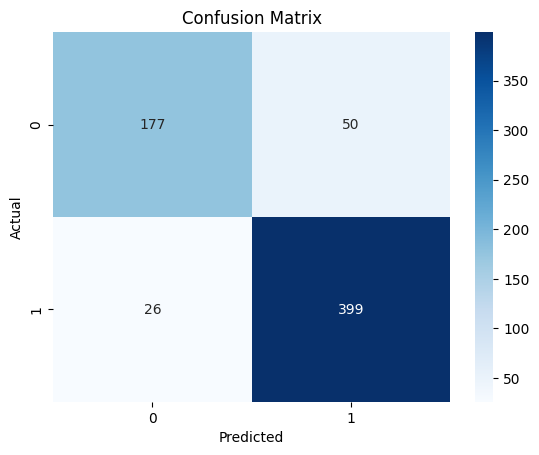

In [22]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [23]:

TN, FP, FN, TP = cm.ravel()

if (TP + FN) > 0:
  true_positive_rate = TP / (TP + FN)
  print(f"True Positive Rate (Sensitivity/Recall): {true_positive_rate:.4f}")
else:
  print("True Positive Rate: Undefined (No actual positives in the test set)")

if (FP + TN) > 0:
  false_positive_rate = FP / (FP + TN)
  print(f"False Positive Rate (Fall-out): {false_positive_rate:.4f}")
else:
  print("False Positive Rate: Undefined (No actual negatives in the test set)")

print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")

True Positive Rate (Sensitivity/Recall): 0.9388
False Positive Rate (Fall-out): 0.2203
True Positives (TP): 399
False Positives (FP): 50
True Negatives (TN): 177
False Negatives (FN): 26


In [24]:
predictions = svc.predict(X_test_vec)

In [27]:
new_review = ["service was bad but food was really tasty"]
new_review_vec = vectorizer.transform(new_review)
prediction = svc.predict(new_review_vec)
print("Sentiment:", prediction[0])

Sentiment: Bad
